# CZ gate general numerical simulation

In [1]:
from resources.notebook_library import *
from resources.gate_simulation.ghz import ghz_simulation
GateSimulation  = ghz_simulation
sim = GateSimulation.Simulation('O-x-O',load_setup=True,load_analytical=True)

Loading O-x-O setup
Preparing Analytical sub-class
Preparing SuperoperatorBellPair sub-class

Done!


In [20]:
n_points = 51
C_sweep = np.logspace(math.log10(3),4,n_points)

result = np.full(np.shape(C_sweep),{})

tuning_dict = {}
tuning_dict[sg.var(f'r0_p')] = 0
tuning_dict[sg.var(f'r0_i')] = 0
tuning_dict[sg.var(f'r1_i')] = 0
tuning_dict[sg.var(f'r1_p')] = 0
tuning_dict[sg.var('tgr')] = 1

for i,C_val in enumerate(C_sweep):
    tuning_dict[sg.var('De0')] = sg.sqrt(C_val)
    
    tuning_dict[sg.var('DE')] = sg.sqrt(C_val)#0.5 * np.sqrt(b*(4*C_val+b))
    tuning_dict[sg.var('De')] = 0 #0.5*C_val/ tuning_dict[sg.var('DE')]

    tuning_dict[sg.var('C')] = C_val
    tuning_dict[sg.var('c')] = C_val

    perf = sim.SuperoperatorBellPair.simulate(tuning_dict)

    result[i] = perf


In [21]:
fidelity = np.zeros(n_points)
p_succ = np.zeros(n_points)
t_g = np.zeros(n_points)
scaling = np.zeros(n_points)
for i in range(n_points):
    fidelity[i] = result[i]['fidelity']
    p_succ[i] = result[i]['p_success']
    t_g[i] = result[i]['gate_time']
    scaling[i] = 1/np.sqrt(C_sweep[i])

In [22]:
perf

{'fidelity': 0.9993613006805385,
 'p_success': 0.807152734428388,
 'gate_time': 6.041430058882398,
 'concurrence': 0.9996185219954137}

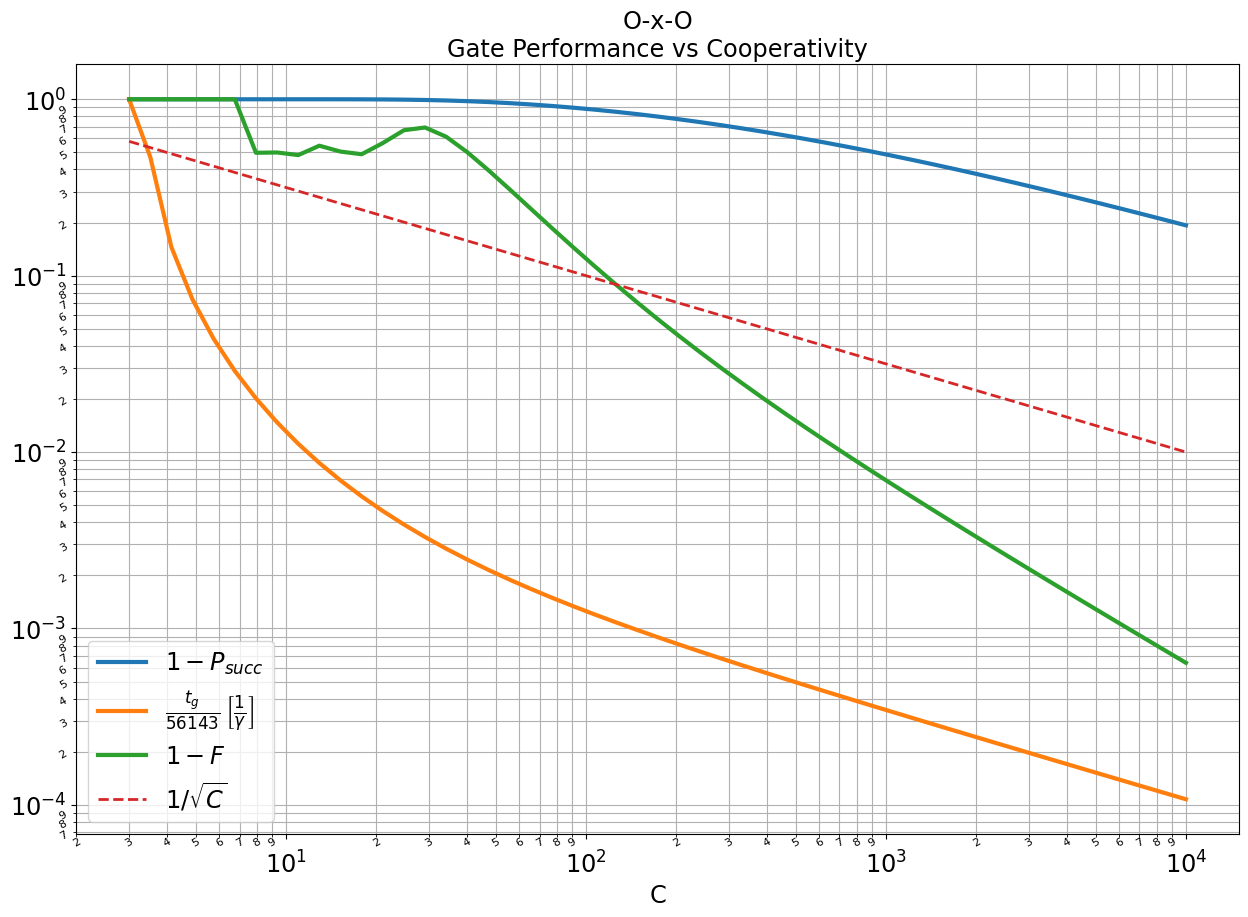

In [24]:
set_plot_big(True)

scaling_offset = 1

ax =plt.plot(C_sweep,1-p_succ,linewidth=3.0,label='$1-P_{succ}$')
plt.plot(C_sweep,t_g/np.max(t_g),linewidth=3.0,label=r"$\frac{t_g}{"+str(int(np.max(t_g)))+"}$"+r"$\,\left[\frac{1}{\gamma}\right]$")
plt.plot(C_sweep,1-fidelity,linewidth=3.0,label='$1-F$')
plt.plot(C_sweep,scaling_offset*scaling,linewidth=2.0,label=r'$1/\sqrt{C}$',linestyle='--')
plt.title(f'{sim.setup_char}\nGate Performance vs Cooperativity')
plt.xlabel('C')
plt.yscale('log')
plt.xscale('log')
plt.grid(which='both')
plt.tick_params(axis='y', which='minor')
plt.legend()
ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis='y', which='minor')



def firstDigit(n):
    n = n*10**int(-math.log10(n)+1)
    digits = (int)(math.log10(n))
    n = (int)(n / pow(10, digits))
    return n

from matplotlib.ticker import FuncFormatter
def minor(x, pos):
    return  (firstDigit(x))

formatter = FuncFormatter(minor)
ax.yaxis.set_minor_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.tick_params(axis='both', which='minor', labelsize=8, rotation=30)
ax.tick_params(axis='x',which='minor', pad=-1)
ax.tick_params(axis='x',which='major', pad=8)
plt.legend()

save_file = f"plots/{sim.setup_char}_Csweep"


plt.savefig(save_file+'.pgf')
#plt.show()

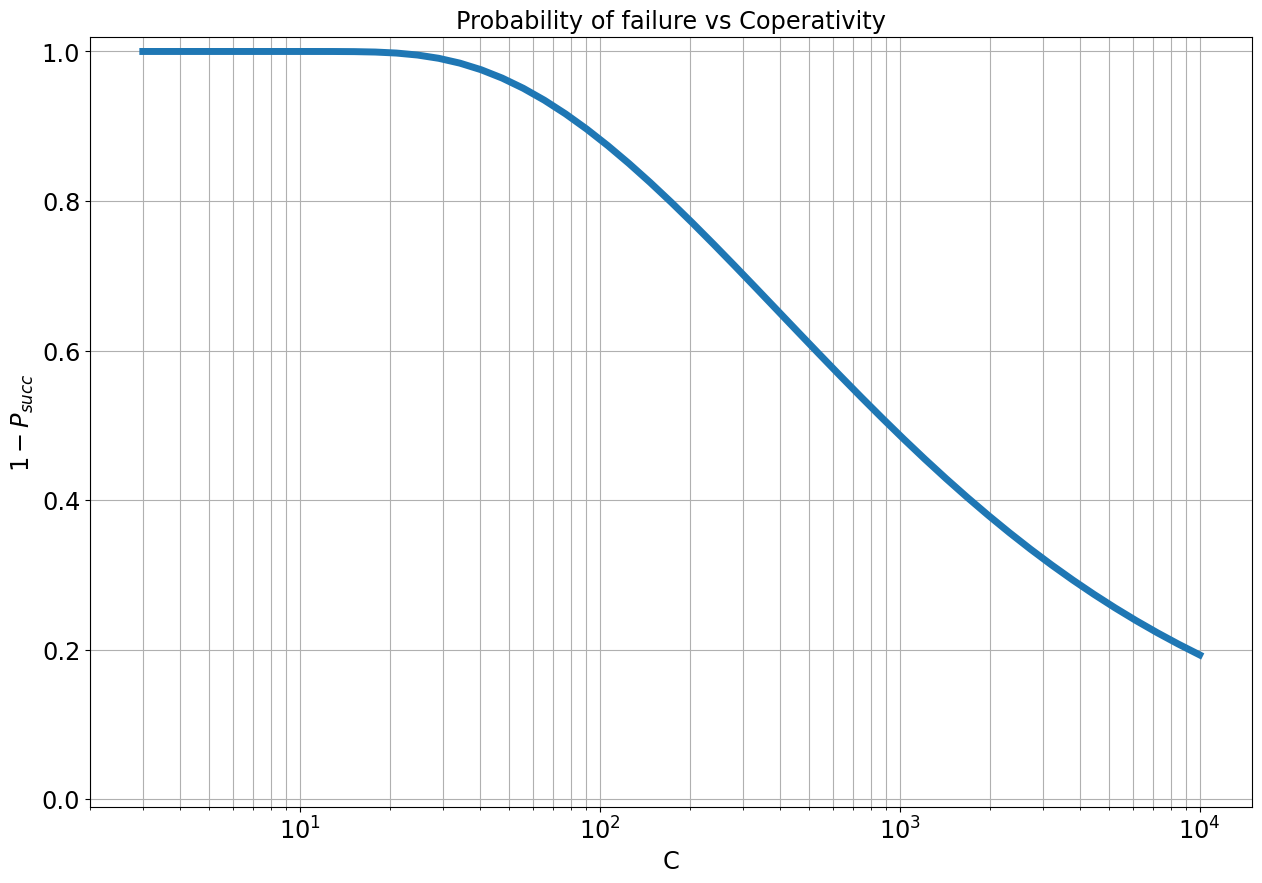

In [26]:
plt.title(f"Probability of failure vs Coperativity")#
plt.plot(C_sweep,1-p_succ,linewidth=5.0)
plt.xlabel('C')
plt.ylabel(r"$1-P_{succ}$")
plt.xscale('log')
plt.ylim(-0.01,1.02)
plt.grid(which='both')
#plt.savefig(f'plots/1-p.svg')

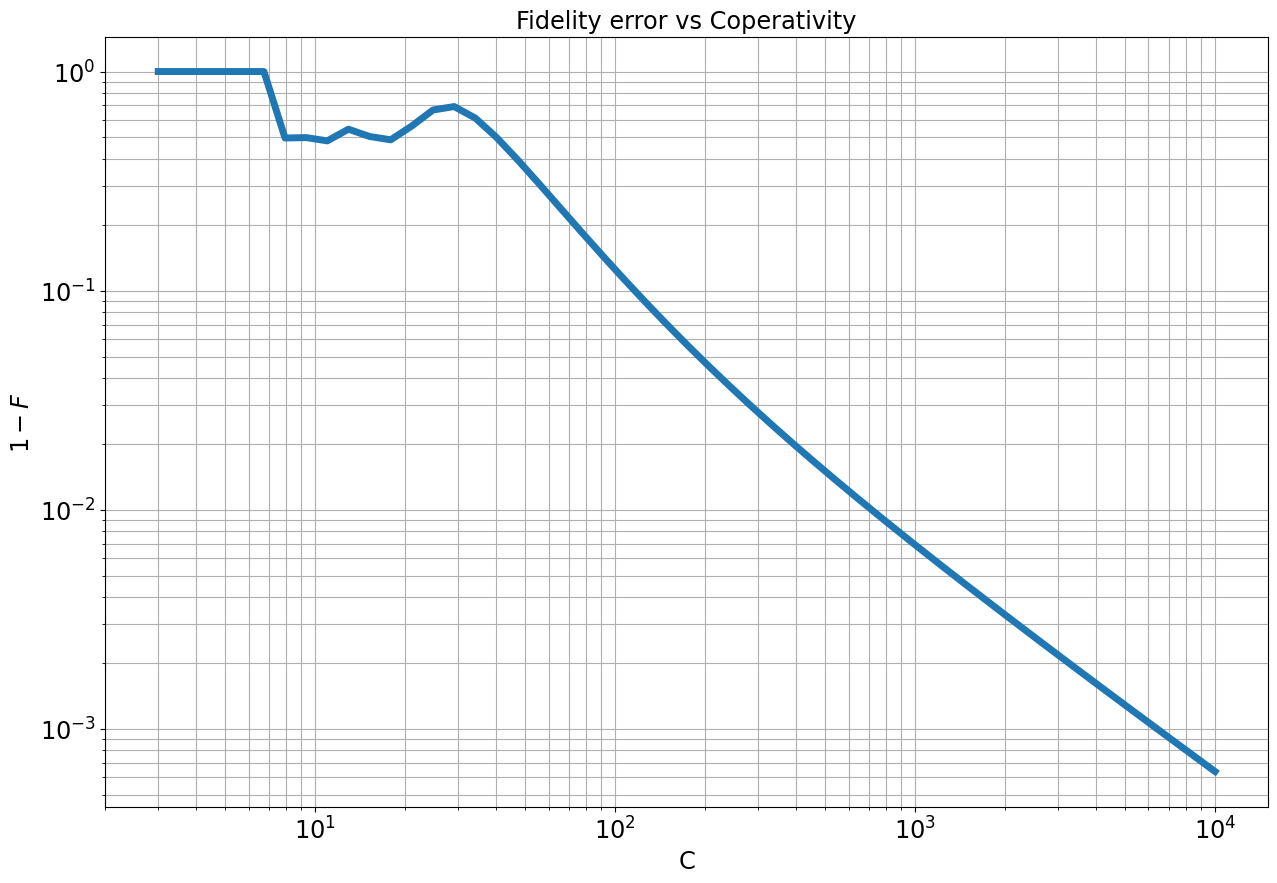

In [25]:
plt.plot(C_sweep,1-fidelity,linewidth=5.0)
plt.title(f'Fidelity error vs Coperativity')
plt.xlabel('C')
plt.ylabel(r"$1-F$")
plt.xscale('log')
plt.yscale('log')

#plt.ylim(-0.1,1.01)
plt.grid(which='both')
plt.savefig(f'plots/1-f.svg')

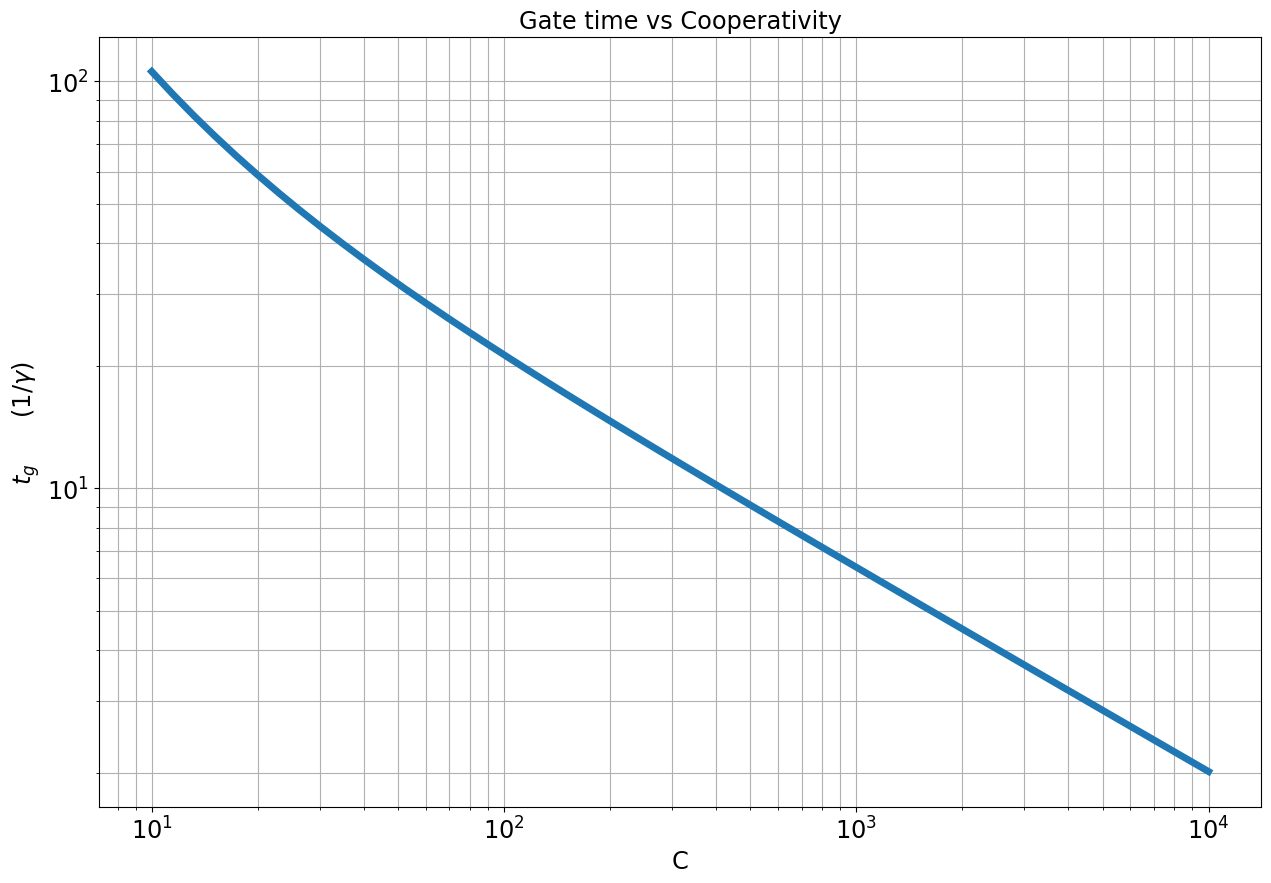

In [19]:
plt.plot(C_sweep,t_g,linewidth=5.0)
plt.title(f'Gate time vs Cooperativity')
plt.xlabel('C')
plt.ylabel(r"$t_g \qquad \left( 1/\gamma \right)$ ")
plt.yscale('log')
plt.xscale('log')
plt.grid(which='both')
plt.savefig(f'plots/tg.svg')